# Data Exploration, Transformation and Cleansing of Stroke Dataset

## 1. Firstly the necessary libraries are loaded including numpy, pandas, scipy and matplotlib

In [2]:
# Import Libraries
try:
    import numpy as np
    import pandas as pd
    import scipy.stats as stats
    import matplotlib.pyplot as plt
    %matplotlib inline
    print('The libraries were loaded successfully')
    
except:
    print('There was an error loading the libraries')

The libraries were loaded successfully


## 2. The dataset is loaded from a csv and the top rows are loaded

In [3]:
# Load Dataset
df_stroke = pd.read_csv('data/healthcare-dataset-stroke-data.csv',delimiter=',',header='infer')
df_stroke.head()
df_stroke.isnull().sum()
df_stroke[df_stroke.isnull().any(axis=1)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


## 3. The shape of the dataset is identified

In [4]:
shape = df_stroke.shape

print(f'The data set has {shape[0]} rows')
print(f'The data set has {shape[1]} columns')

The data set has 5110 rows
The data set has 12 columns


## 4. Identify the type of data in each column

In [5]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## 5. Identify if there is duplicated data

In [6]:
duplicated_rows = df_stroke.duplicated().sum()
print(f'There are {duplicated_rows} duplicated rows')


There are 0 duplicated rows


## 6. Describe numerical columns

In [7]:
df_stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## 7. Describe categorical columns

In [8]:
categorical_variables = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
df_stroke[categorical_variables].describe()    

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


## 8. Identify all the unique values in the categorical columns

In [9]:
for col in categorical_variables:
    print(f'The unique values for the column {col} are:')
    print(df_stroke[col].unique())
    print('\n')

The unique values for the column gender are:
['Male' 'Female' 'Other']


The unique values for the column ever_married are:
['Yes' 'No']


The unique values for the column work_type are:
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


The unique values for the column Residence_type are:
['Urban' 'Rural']


The unique values for the column smoking_status are:
['formerly smoked' 'never smoked' 'smokes' 'Unknown']




## 9. Convert categorical columns to numerical

In [10]:
# Convert gender from a categorical column to numerical column
df_stroke.gender = pd.Categorical(df_stroke.gender)
df_stroke['gender'] = df_stroke.gender.cat.codes
print('The values in the column gender have been updated from male to 1 and female to 0\n')

# Convert ever_married from a categorical column to numerical column
df_stroke.ever_married = pd.Categorical(df_stroke.ever_married)
df_stroke['ever_married'] = df_stroke.ever_married.cat.codes
print('The values in the column ever_married have been updated from yes to 1 and no to 0\n')

# Convert ever_married from a categorical column to numerical column
df_stroke.work_type = pd.Categorical(df_stroke.work_type)
df_stroke['work_type'] = df_stroke.work_type.cat.codes
print('The values in the column work_type have been updated from Private to 2, from Self-employed to 3, from Govt_job to 0, from children to 4 and from Never_worked to 1\n')

# Convert Residence_type from a categorical column to numerical column
df_stroke.Residence_type = pd.Categorical(df_stroke.Residence_type)
df_stroke['Residence_type'] = df_stroke.Residence_type.cat.codes
print('The values in the column Residence_type have been updated from Urban to 1 and from Rural to 0\n')

# Convert smoking_status from a categorical column to numerical column
df_stroke.smoking_status = pd.Categorical(df_stroke.smoking_status)
df_stroke['smoking_status'] = df_stroke.smoking_status.cat.codes
print('The values in the column smoking_status have been updated from formerly smoked to 1, from never smoked to 2, from smokes to 3, from Unknown to 0\n')

The values in the column gender have been updated from male to 1 and female to 0

The values in the column ever_married have been updated from yes to 1 and no to 0

The values in the column work_type have been updated from Private to 2, from Self-employed to 3, from Govt_job to 0, from children to 4 and from Never_worked to 1

The values in the column Residence_type have been updated from Urban to 1 and from Rural to 0

The values in the column smoking_status have been updated from formerly smoked to 1, from never smoked to 2, from smokes to 3, from Unknown to 0



## 10. Now we can review the transformed dataset

In [11]:
df_stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [12]:
df_stroke.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000,5110.000000
mean,36517.829354,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.048728
std,21161.721625,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.854067,1.071534,0.215320
min,67.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,17741.250000,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.500000,0.000000,0.000000
50%,36932.000000,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.100000,2.000000,0.000000
75%,54682.000000,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,33.100000,2.000000,0.000000
max,72940.000000,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


## 11. Identify the features that correlate with strokes

In [13]:
x = df_stroke.corr()
pd.DataFrame(x['stroke']).sort_values(by='stroke',ascending = False).style.background_gradient(cmap = 'Blues')

,stroke
stroke,1.000000
age,0.245257
heart_disease,0.134914
avg_glucose_level,0.131945
hypertension,0.127904
ever_married,0.108340
bmi,0.042374
smoking_status,0.028123
Residence_type,0.015458
gender,0.008929


In [32]:
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.030738,0.021578,0.082712,-0.037237,0.058560,-0.005014,0.053664,-0.026678,-0.060004,0.006757
age,-0.030738,1.000000,0.274425,0.257123,0.680782,-0.366987,0.010948,0.235838,0.333398,0.275515,0.232331
hypertension,0.021578,0.274425,1.000000,0.115991,0.162406,-0.052750,-0.001074,0.180543,0.167811,0.110808,0.142515
heart_disease,0.082712,0.257123,0.115991,1.000000,0.111245,-0.030373,-0.002362,0.154525,0.041357,0.055236,0.137938
ever_married,-0.037237,0.680782,0.162406,0.111245,1.000000,-0.357946,0.004989,0.151377,0.341695,0.264642,0.105089
work_type,0.058560,-0.366987,-0.052750,-0.030373,-0.357946,1.000000,-0.005422,-0.050581,-0.304876,-0.310911,-0.033756
Residence_type,-0.005014,0.010948,-0.001074,-0.002362,0.004989,-0.005422,1.000000,-0.007617,-0.000122,0.013810,0.006031
avg_glucose_level,0.053664,0.235838,0.180543,0.154525,0.151377,-0.050581,-0.007617,1.000000,0.175502,0.066335,0.138936
bmi,-0.026678,0.333398,0.167811,0.041357,0.341695,-0.304876,-0.000122,0.175502,1.000000,0.224473,0.042374
smoking_status,-0.060004,0.275515,0.110808,0.055236,0.264642,-0.310911,0.013810,0.066335,0.224473,1.000000,0.051558


C:\Users\User\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
C:\Users\User\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shap

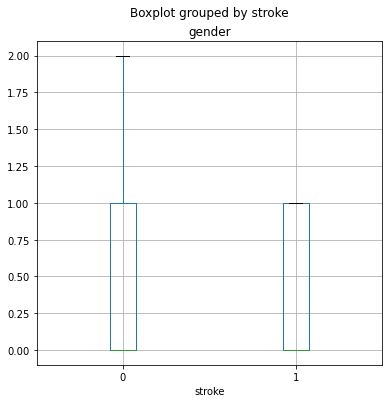

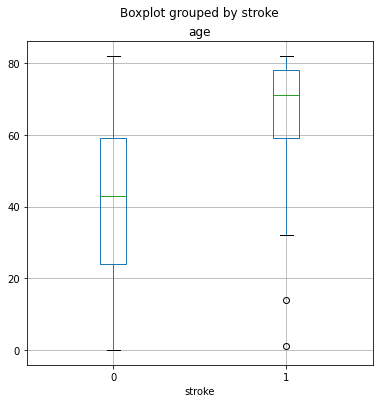

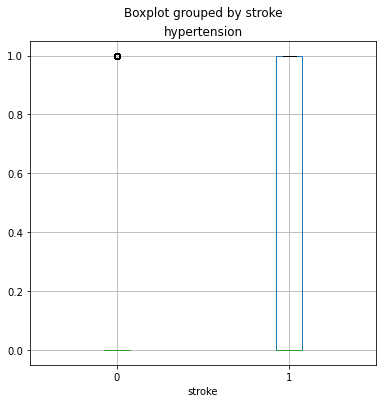

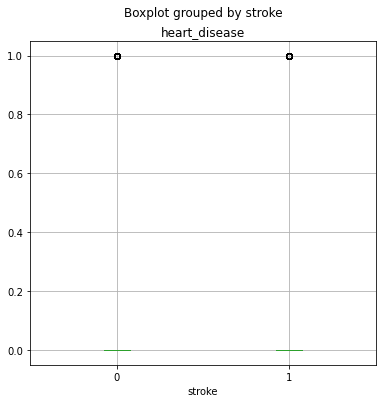

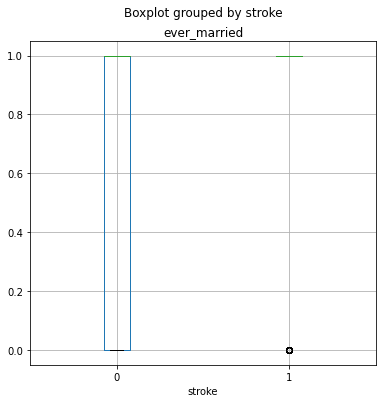

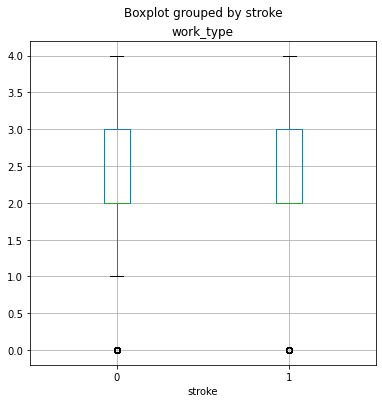

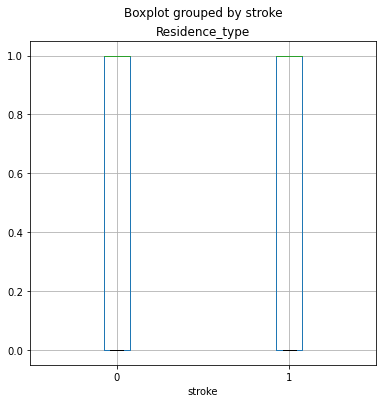

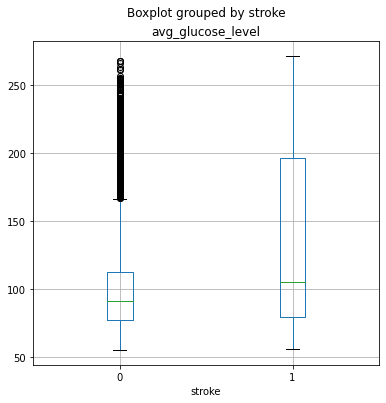

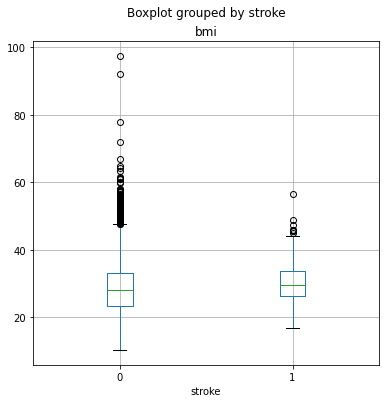

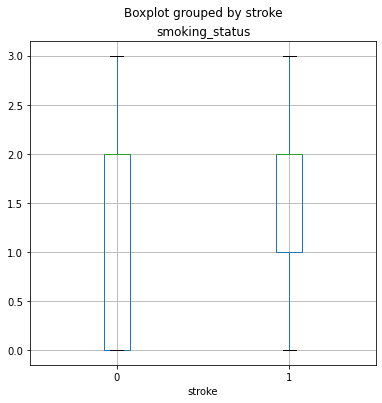

In [14]:
features = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']
for col in features:
    df_stroke.boxplot(column=col, by='stroke', figsize=(6,6))
    plt.title(col)
plt.show()

## 12. Identify if there is null data

In [15]:
df_stroke.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## 13. Identify if bmi data is normalised

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


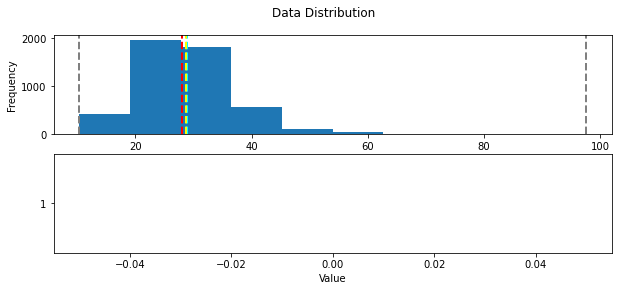

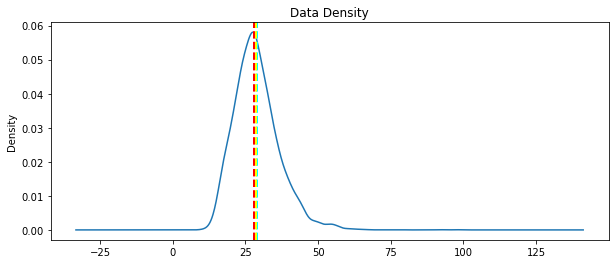

In [16]:
# Get the variable to examine
var = df_stroke['bmi']

# Create a function that we can re-use
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()

# Get the variable to examine
col = df_stroke['bmi']
# Call the function
show_distribution(col)

def show_density(var_data):
    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

# Get the density of Grade
show_density(col)

## 14. As the bmi data is not normally distributed the null rows are removed

In [17]:
df_stroke = df_stroke.dropna(axis=0, how='any')
df_stroke.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## 15. Exploring stroke patient vs non-stroke patient population

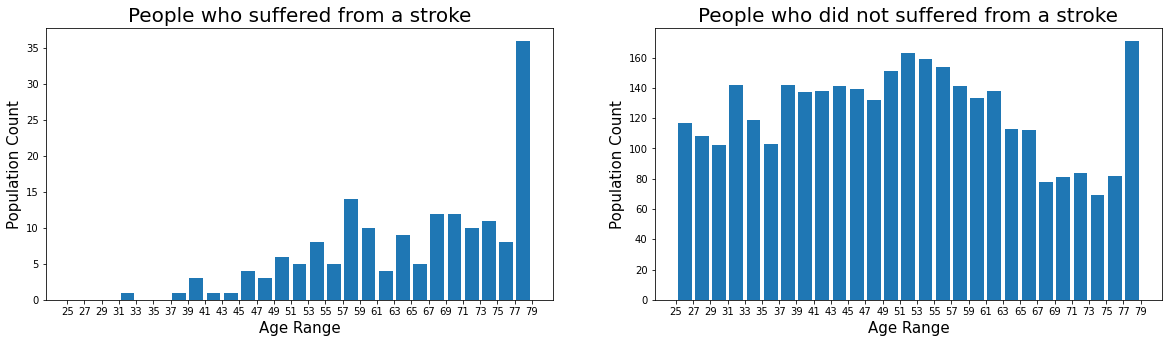

In [18]:
fig, (ax3,ax4) = plt.subplots(1,2, figsize = (20,5))
plt.subplots_adjust(hspace = 0.5)
bin_x = range(25,80,2)


ax3.hist(df_stroke[df_stroke['stroke']==1].age.tolist(),bins=bin_x,rwidth=0.8)
ax3.set_xticks(range(25,80,2))
ax3.set_xlabel('Age Range',fontsize=15)
ax3.set_ylabel('Population Count',fontsize=15)
ax3.set_title('People who suffered from a stroke',fontsize=20)

ax4.hist(df_stroke[df_stroke['stroke']==0].age.tolist(),bins=bin_x,rwidth=0.8)
ax4.set_xticks(range(25,80,2))
ax4.set_xlabel('Age Range',fontsize=15)
ax4.set_ylabel('Population Count',fontsize=15)
ax4.set_title('People who did not suffered from a stroke',fontsize=20)

plt.show()

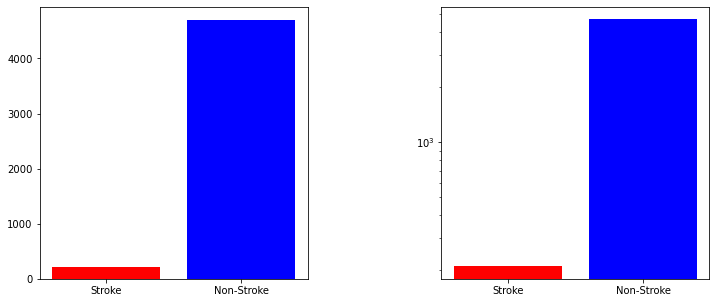

In [19]:
fig, (ax6,ax7) = plt.subplots(1,2,figsize = (12,5),constrained_layout=False)
plt.subplots_adjust(wspace = 0.5)

ax6.bar(df_stroke.stroke.unique(),df_stroke.stroke.value_counts(),color = ['blue','red'],width = 0.8)
ax6.set_xticks(df_stroke.stroke.unique())
ax6.set_xticklabels(('Non-Stroke','Stroke'))

ax7.bar(df_stroke.stroke.unique(),df_stroke.stroke.value_counts(),color = ['blue','red'],width = 0.8)
ax7.set_xticks(df_stroke.stroke.unique())
ax7.set_xticklabels(('Non-Stroke','Stroke'))
ax7.set_yscale('log')

plt.show()

In [26]:
df_stroke.stroke.value_counts()

0    4700
1     209
Name: stroke, dtype: int64

## 16. Explore gender within the sample population

In [20]:
female_count = df_stroke.gender.value_counts().tolist()[0]
male_count = df_stroke.gender.value_counts().tolist()[1]
other_count = df_stroke.gender.value_counts().tolist()[2]
print('Male :',male_count)
print('Female :',female_count)
print('Other :',other_count)

Male : 2011
Female : 2897
Other : 1


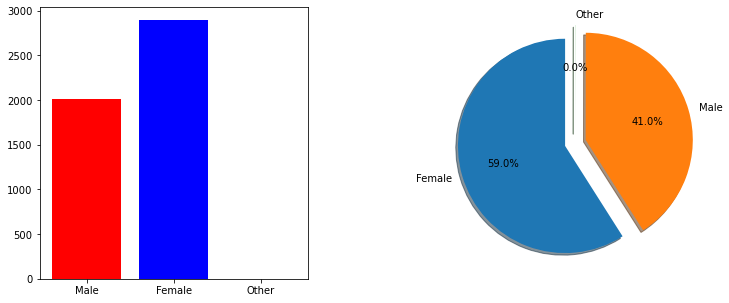

In [21]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (12,5),constrained_layout=False)
plt.subplots_adjust(wspace = 0.5)
ax1.bar(df_stroke.gender.unique(),df_stroke.gender.value_counts(),color = ['blue','red'],width = 0.8)
ax1.set_xticks(df_stroke.gender.unique())
ax1.set_xticklabels(('Female','Male', "Other"))

ax2.pie((female_count, male_count, other_count), labels = ('Female','Male', "Other"), autopct='%1.1f%%', shadow=True, startangle=90, explode=[0.1, 0.1 ,0.1])

plt.show()

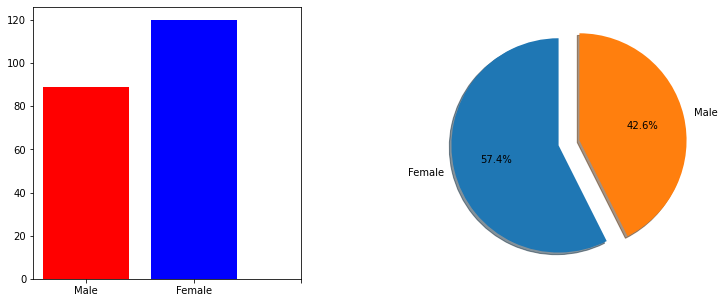

In [30]:
female_count = df_stroke[df_stroke['stroke']==1].gender.value_counts().tolist()[0]
male_count = df_stroke[df_stroke['stroke']==1].gender.value_counts().tolist()[1]
#other_count = df_stroke[df_stroke['stroke']==1].gender.value_counts().tolist()[2]



fig, (ax1,ax2) = plt.subplots(1,2,figsize = (12,5),constrained_layout=False)
plt.subplots_adjust(wspace = 0.5)
ax1.bar(df_stroke[df_stroke['stroke']==1].gender.unique(),df_stroke[df_stroke['stroke']==1].gender.value_counts(),color = ['blue','red'],width = 0.8)
ax1.set_xticks(df_stroke.gender.unique())
ax1.set_xticklabels(('Female','Male'))

ax2.pie((female_count, male_count), labels = ('Female','Male'), autopct='%1.1f%%', shadow=True, startangle=90, explode=[0.1, 0.1])

plt.show()

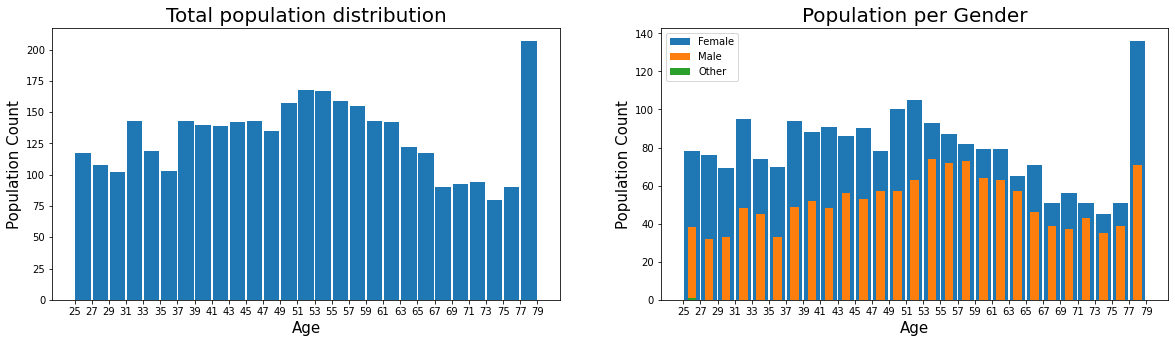

In [22]:
# Population Distribution with age and sex

fig, (ax1,ax2) = plt.subplots(1,2, figsize = (20,5),constrained_layout=False)
bin_x = range(25,80,2)

ax1.hist(df_stroke.age.tolist(),bins=bin_x,rwidth=0.9)
ax1.set_xticks(range(25,80,2))
ax1.set_xlabel('Age',fontsize=15)
ax1.set_ylabel('Population Count',fontsize=15)
ax1.set_title('Total population distribution',fontsize=20)

ax2.hist(df_stroke[df_stroke['gender']==0].age.tolist(),label = 'Female',bins=bin_x,rwidth=0.9)
ax2.hist(df_stroke[df_stroke['gender']==1].age.tolist(),label = 'Male',bins=bin_x,rwidth=0.5)
ax2.hist(df_stroke[df_stroke['gender']==2].age.tolist(),label = 'Other',bins=bin_x,rwidth=0.5)


ax2.legend()
ax2.set_xticks(range(25,80,2))
ax2.set_xlabel('Age',fontsize=15)
ax2.set_ylabel('Population Count',fontsize=15)
ax2.set_title('Population per Gender',fontsize=20)

plt.show()

## 17. The ID column will be removed as it is not needed to train the machine learning model

In [23]:
try:
    del df_stroke['id']
    print('The column "id" was successfully deleted')
except:
    print('The column "id" was not deleted')

The column "id" was successfully deleted


## 18. Now that the data has been transformed and cleansed it will be saved as a csv for use in the classification model

In [24]:
df_stroke.to_csv('data/cleansed-healthcare-dataset-stroke-data.csv', index=False)
print('The csv was successfully saved as cleansed-healthcare-dataset-stroke-data.csv')

The csv was successfully saved as cleansed-healthcare-dataset-stroke-data.csv
